# Background Problem

A company name Amazon Web Service (AWS) operates as a SaaS (Software as a Service) provider, offering sales and marketing software solutions to other businesses (B2B). As the company grows, it faces increasing complexity. Market competition is intensifying, customer segments are becoming more diverse, and the volume of data generated from each sales transaction is growing exponentially. As a result, the company is looking to recruit a **data analyst** to help manage these challenges. Specifically, the company wants to identify **which companies have a higher likelihood to purchase** and how to **optimize the company sales** since there are some products have a low sales performance.

# Problem Statement

1. Since the company wants to optimize their sales, the first step as a data analyst is to **analyze the overall sales performance** to understand how the company is currently performing.

2. After assessing the company's performance, the next step is to **identify each product's sales performance** and **identify which products have a low sales performance**.

3. Once the low-performing products are identified, the company would want to improve their sales. To achieve this, it is important to **understand why the products are underperforming**.

4. With insights into customer preferences, the next step is to **determine which products are likely to be purchased by each customer segment**.

5. Finally, we can also **identify which companies are potential buyers**, helping to target the right customers and boost sales performance.

# Analysis Purposes

1. **Evaluate Sales Performance:** To gain a clear understanding of the current state of AWS's overall sales performance and identify trends or issues in the sales data.

2. **Identify Low-Performing Products:** To pinpoint specific products that are underperforming in terms of sales and require attention for improvement.

3. **Understand Reasons for Underperforming Products:** To determine what factors are leading to low sales performance for certain products and give recommendation or strategies to improve underperforming products

4. **Identify Potential Buyers:** To discover and target companies that are potential high-value buyers, enabling AWS to focus on the most promising prospects for boosting sales performance.

# Analysis

## 1. Load "SaaS (Software As A Service) Sales" Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import datetime as dt
import plotly.express as px
from functools import reduce
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, kruskal
from statsmodels.stats.proportion import proportions_ztest

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("/Users/vinavalentia/Documents/SEMESTER 7/BOOTCAMP/Module 2/Capston/SaaS-Sales.csv")
display (df.head(), df.tail())

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
9989,9990,EMEA-2020-110422,1/22/2020,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.248,3,0.2,4.1028
9990,9991,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.960,2,0.0,15.6332
9991,9992,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.576,2,0.2,19.3932
9992,9993,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.600,4,0.0,13.3200
9993,9994,AMER-2023-119914,5/5/2023,20230505,Jasmine Springer,United States,Dallas,AMER,NAMER,Comcast,1022,Communications,SMB,OneView,3NTBV9B3PS,243.160,2,0.0,72.9480


The dataset above is transaction data from a fictitious SaaS company called AWS selling sales and marketing software to other companies (B2B).<br>
There are 19 collumns in the dataset : <br>
| No. | Collumn Name | Information |
|-----|--------------|-------------|
| 1. | Row ID |A unique identifier for each transaction |
| 2. | Order ID | A unique identifier for each order |
| 3. | Order Date | The date when the order was placed |
| 4. | Date Key | A numerical representation of the order date (YYYYMMDD) |
| 5. | Contact Name | The name of the person who placed the order |
| 6. | Country | The country where the order was placed |
| 7. | City | The city where the order was placed |
| 8. | Region | The region where the order was placed |
| 9. | Subregion | The subregion where the order was placed |
| 10. | Customer | The name of the company that placed the order |
| 11. | Customer ID | A unique identifier for each customer |
| 12. | Industry | The industry the customer belongs to |
| 13. | Segment | The customer segment (SMB, Strategic, Enterprise, etc.) |
| 14. | Product | The product was ordered | 
| 15. | License | The license key for the product |
| 16. | Sales | The total sales amount for the transaction |
| 17. | Quantity | The total number of items in the transaction |
| 18. | Discount | The discount applied to the transaction |
| 19. | Profit | The profit from the transaction |

## 2. Exploratory Data Analysis (EDA)

## Data Understanding

---

In [3]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')

Jumlah baris dan kolom di dataset df adalah (9994, 19)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 

In [5]:
df.describe()

,Row ID,Date Key,Customer ID,Sales,Quantity,Discount,Profit
count,9994.000000,9.994000e+03,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2.021803e+07,1049.771963,229.858001,3.789574,0.156203,28.656896
std,2885.163629,1.123898e+04,29.719388,623.245101,2.225110,0.206452,234.260108
min,1.000000,2.020010e+07,1001.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2.021052e+07,1024.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2.022063e+07,1049.000000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2.023052e+07,1076.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2.023123e+07,1101.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
df.describe(include='object')

,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Industry,Segment,Product,License
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,1237,793,48,262,3,12,99,10,3,14,9994
top,EMEA-2023-100111,9/6/2022,Leonard Kelly,United States,London,EMEA,NAMER,Allianz,Finance,SMB,ContactMatcher,16GRM07R1K
freq,14,38,37,2001,922,4219,2507,192,2127,5191,1842,1


In [7]:
# data unique di tiap kolom
pd.set_option('display.max_colwidth', 100)
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,Row ID,9994,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, ..."
1,Order ID,5009,"[EMEA-2022-152156, AMER-2022-138688, EMEA-2021-108966, AMER-2020-115812, EMEA-2023-114412, AMER-..."
2,Order Date,1237,"[11/9/2022, 6/13/2022, 10/11/2021, 6/9/2020, 4/16/2023, 12/6/2022, 11/22/2021, 11/11/2020, 5/13/..."
3,Date Key,1237,"[20221109, 20220613, 20211011, 20200609, 20230416, 20221206, 20211122, 20201111, 20200513, 20200..."
4,Contact Name,793,"[Nathan Bell, Deirdre Bailey, Zoe Hodges, Thomas Hodges, Adrian Hunter, Adrian Abraham, Emily Mo..."
5,Country,48,"[Ireland, United States, Germany, Sweden, Canada, Japan, Italy, Turkey, Costa Rica, France, Aust..."
6,City,262,"[Dublin, New York City, Stuttgart, Stockholm, Toronto, Saitama, Naples, Ankara, Los Angeles, San..."
7,Region,3,"[EMEA, AMER, APJ]"
8,Subregion,12,"[UKIR, NAMER, EU-WEST, NOR, JAPN, EU, MEA, LATAM, ANZ, APAC, IND, EU-EAST]"
9,Customer,99,"[Chevron, Phillips 66, Royal Dutch Shell, BNP Paribas, Engie, Microsoft, Pfizer, Toyota Motor, H..."


In [8]:
df_date = df
df_date['Order Date'] = pd.to_datetime(df['Order Date']).dt.date
min_idx = df['Order Date'].idxmin()
max_idx = df['Order Date'].idxmax()

min_order = df.loc[min_idx, ['Order ID', 'Order Date']]
max_order = df.loc[max_idx, ['Order ID', 'Order Date']]
print(f"Order diambil dari tanggal {min_order['Order Date']} dengan Order ID {min_order['Order ID']}, hingga {max_order['Order Date']} dengan Order ID {max_order['Order ID']}")

Order diambil dari tanggal 2020-01-04 dengan Order ID APJ-2020-103800, hingga 2023-12-31 dengan Order ID APJ-2023-126221


## Data Cleaning

---

In [9]:
df.isnull().sum()

Row ID          0
Order ID        0
Order Date      0
Date Key        0
Contact Name    0
Country         0
City            0
Region          0
Subregion       0
Customer        0
Customer ID     0
Industry        0
Segment         0
Product         0
License         0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df["Order Date"] = pd.to_datetime(df["Order Date"], format="%m/%d/%Y")
df["Day"] = df["Order Date"].dt.day
df["Month"] = df["Order Date"].dt.month
df["Year"] = df["Order Date"].dt.year
df.tail()

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,...,Segment,Product,License,Sales,Quantity,Discount,Profit,Day,Month,Year
9989,9990,EMEA-2020-110422,2020-01-22,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,...,SMB,SaaS Connector Pack,ETHXMB5TMD,25.248,3,0.2,4.1028,22,1,2020
9990,9991,AMER-2023-121258,2023-02-27,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,...,SMB,SaaS Connector Pack,LYHOKTRY7L,91.960,2,0.0,15.6332,27,2,2023
9991,9992,AMER-2023-121258,2023-02-27,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,...,SMB,Site Analytics,I5SVMI6M88,258.576,2,0.2,19.3932,27,2,2023
9992,9993,AMER-2023-121258,2023-02-27,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,...,SMB,Support,JHLW4P6LQ2,29.600,4,0.0,13.3200,27,2,2023
9993,9994,AMER-2023-119914,2023-05-05,20230505,Jasmine Springer,United States,Dallas,AMER,NAMER,Comcast,...,SMB,OneView,3NTBV9B3PS,243.160,2,0.0,72.9480,5,5,2023


In [12]:
df = df.drop(["Row ID", "Order Date", "Date Key"], axis = 1)
df.tail()

,Order ID,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit,Day,Month,Year
9989,EMEA-2020-110422,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.248,3,0.2,4.1028,22,1,2020
9990,AMER-2023-121258,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.960,2,0.0,15.6332,27,2,2023
9991,AMER-2023-121258,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.576,2,0.2,19.3932,27,2,2023
9992,AMER-2023-121258,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.600,4,0.0,13.3200,27,2,2023
9993,AMER-2023-119914,Jasmine Springer,United States,Dallas,AMER,NAMER,Comcast,1022,Communications,SMB,OneView,3NTBV9B3PS,243.160,2,0.0,72.9480,5,5,2023


## c. Data Visualization

---

In [13]:
crest = sns.color_palette("crest", as_cmap=True)

# <span style="color:darkgreen">Corelation Between Quantity, Sales, Discount, & Profit</span>

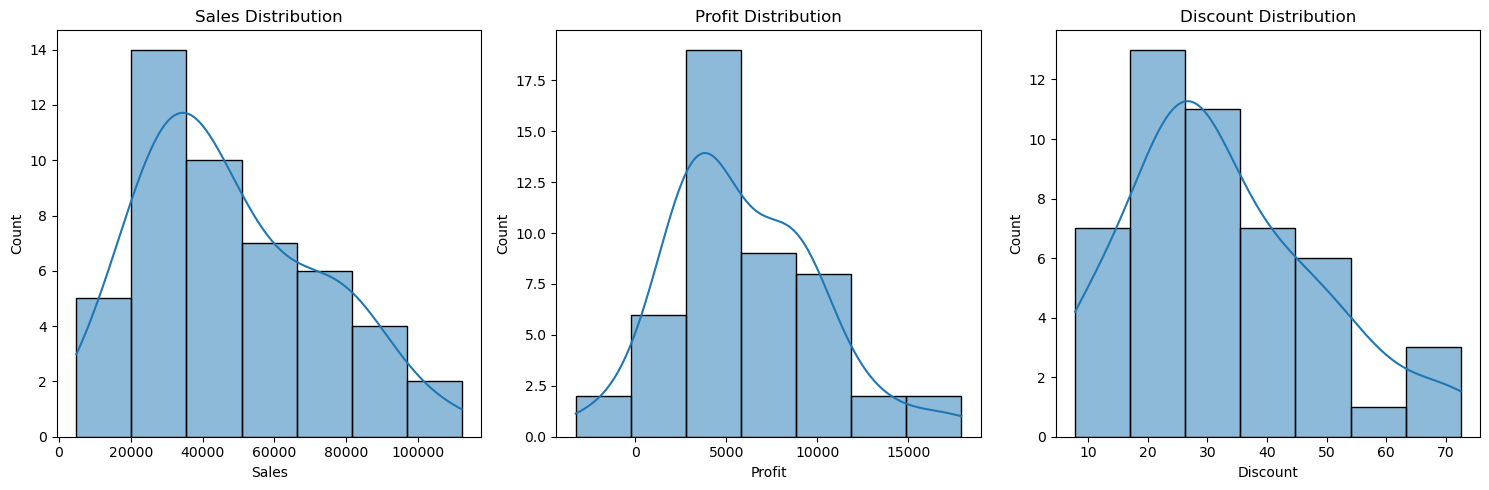

In [14]:
sales_per_month = df.groupby(["Month", "Year"])["Sales"].sum().reset_index()
profit_per_month = df.groupby(["Month", "Year"])["Profit"].sum().reset_index()
discount_per_month = df.groupby(["Month", "Year"])["Discount"].sum().reset_index()

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Sales Distribution
sns.histplot(sales_per_month["Sales"], kde = True, ax = axes[0])
axes[0].set_title("Sales Distribution")

# Profit Distribution
sns.histplot(profit_per_month["Profit"], kde = True, ax = axes[1])
axes[1].set_title("Profit Distribution")

# Discount Distribution
sns.histplot(discount_per_month["Discount"], kde = True, ax = axes[2])
axes[2].set_title("Discount Distribution")

plt.tight_layout()
plt.show()

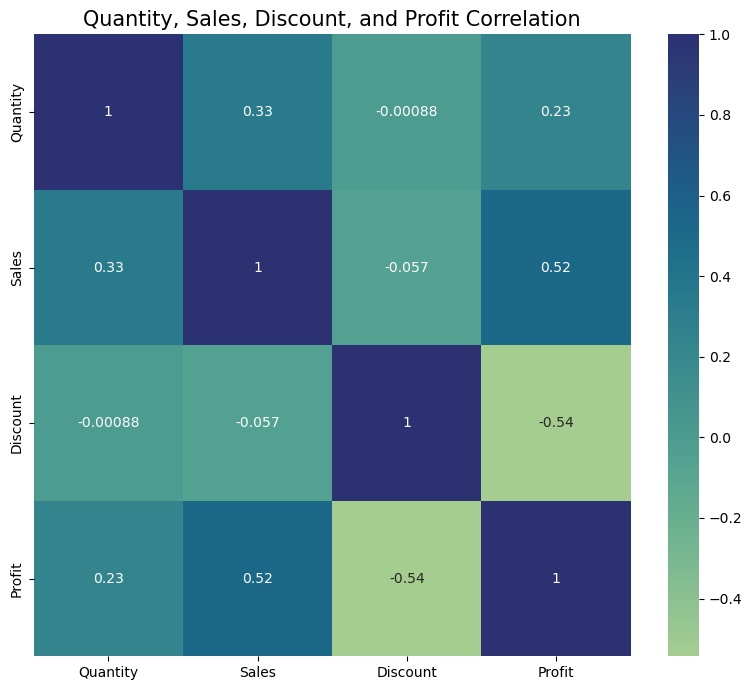

In [15]:
corr_matrix = df[["Quantity", "Sales", "Discount", "Profit"]].corr(method = "spearman")
plt.figure(figsize = (8,7))
sns.heatmap(data = corr_matrix, annot = True, cmap = crest)
plt.title("Quantity, Sales, Discount, and Profit Correlation", size = 15)
plt.tight_layout()
plt.show()

# <span style="color:darkgreen">Sales Trend</span>

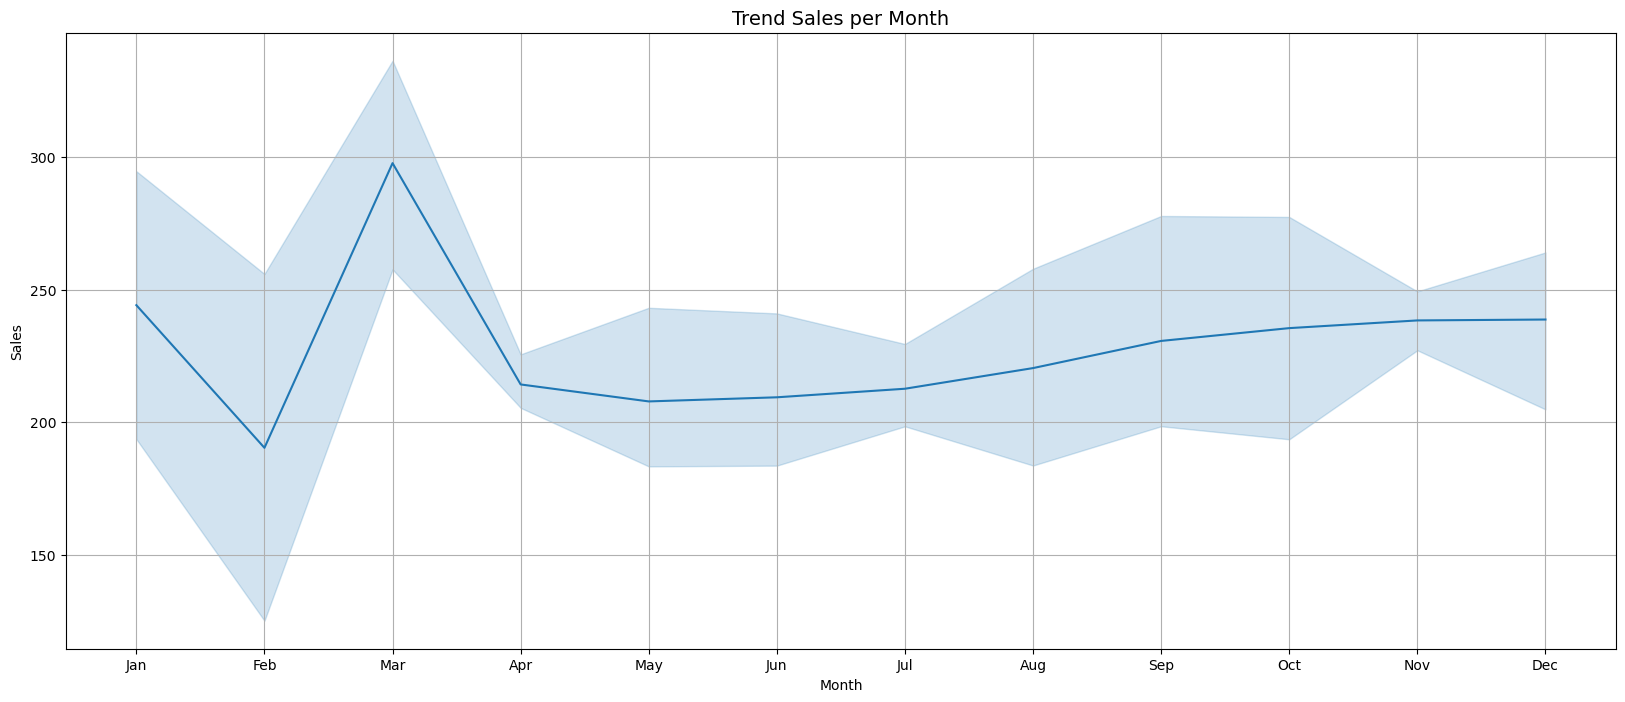

In [16]:
sales_trend = df.groupby(["Year", "Month"])["Sales"].mean().reset_index()
sales_trend["Month"] = sales_trend["Month"].apply(lambda x: calendar.month_abbr[x])

plt.figure(figsize=(20, 8))
sns.lineplot(data = sales_trend,  x = "Month", y = "Sales", palette = crest)
plt.title("Trend Sales per Month", size=14)
plt.xlabel("Month")
plt.ylabel("Sales")
plt.grid(True)
plt.show()

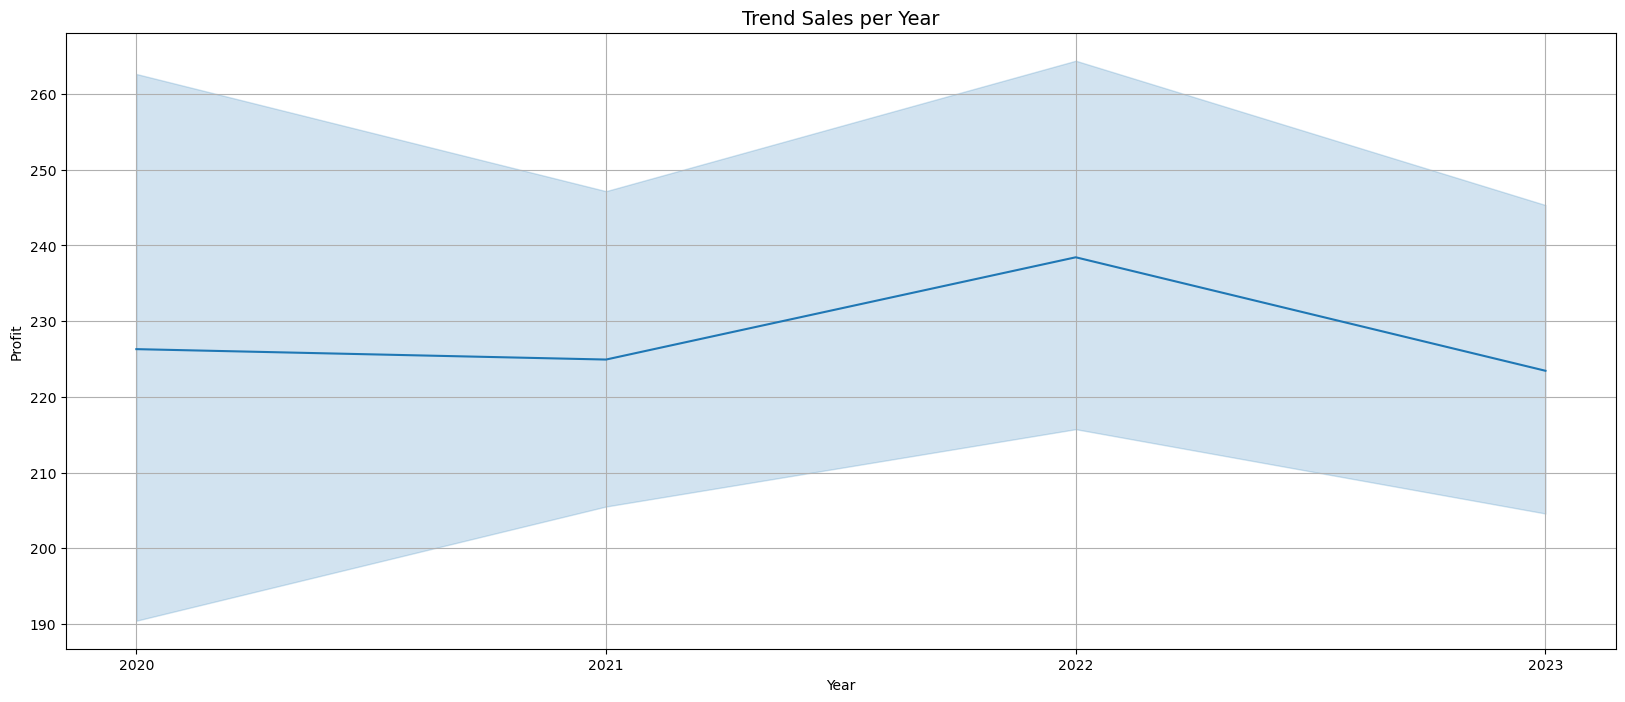

In [17]:
yearly_sales = df.groupby("Year")["Sales"].mean().reset_index()
yearly_sales["Year"] = yearly_sales["Year"].astype(int)

plt.figure(figsize=(20, 8))
sns.lineplot(data = sales_trend,  x = "Year", y = "Sales", palette = crest)
plt.title("Trend Sales per Year", size = 14)
plt.xlabel("Year")
plt.ylabel("Profit")
plt.grid(True)
plt.xticks(yearly_sales["Year"], yearly_sales["Year"].astype(int))
plt.show()

# <span style="color:darkgreen">Sales Performance with Discount</span>

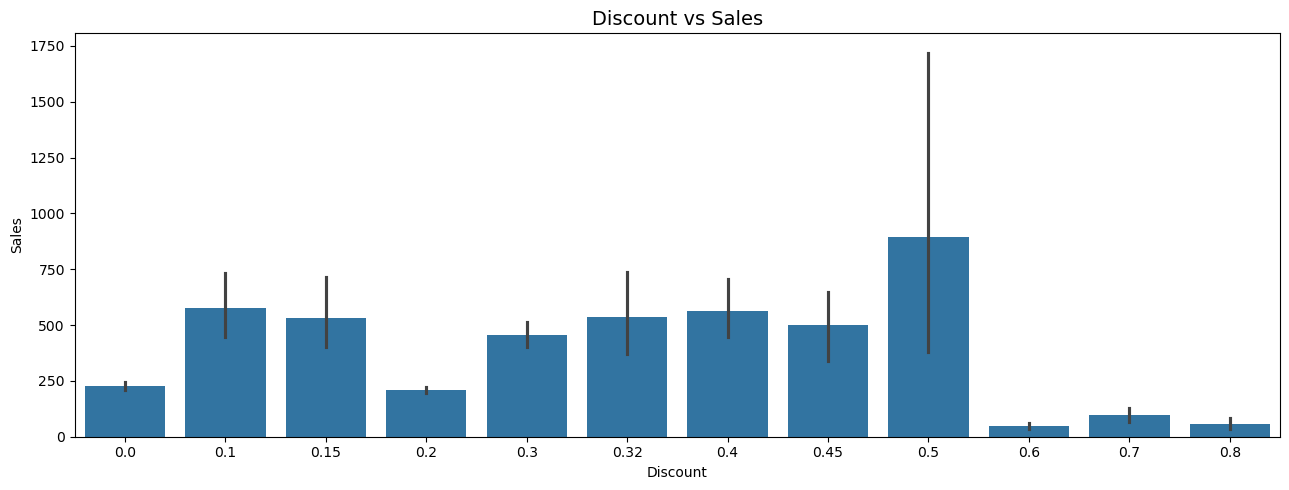

In [18]:
df["Discount"].value_counts().reset_index().sort_values(by = "Discount")
plt.figure(figsize = (13,5))
sns.barplot(data = df, x = "Discount", y = "Sales")
plt.title("Discount vs Sales", size=14)
plt.tight_layout()
plt.show()

# <span style="color:darkgreen">Sales Performance Each Product</span>

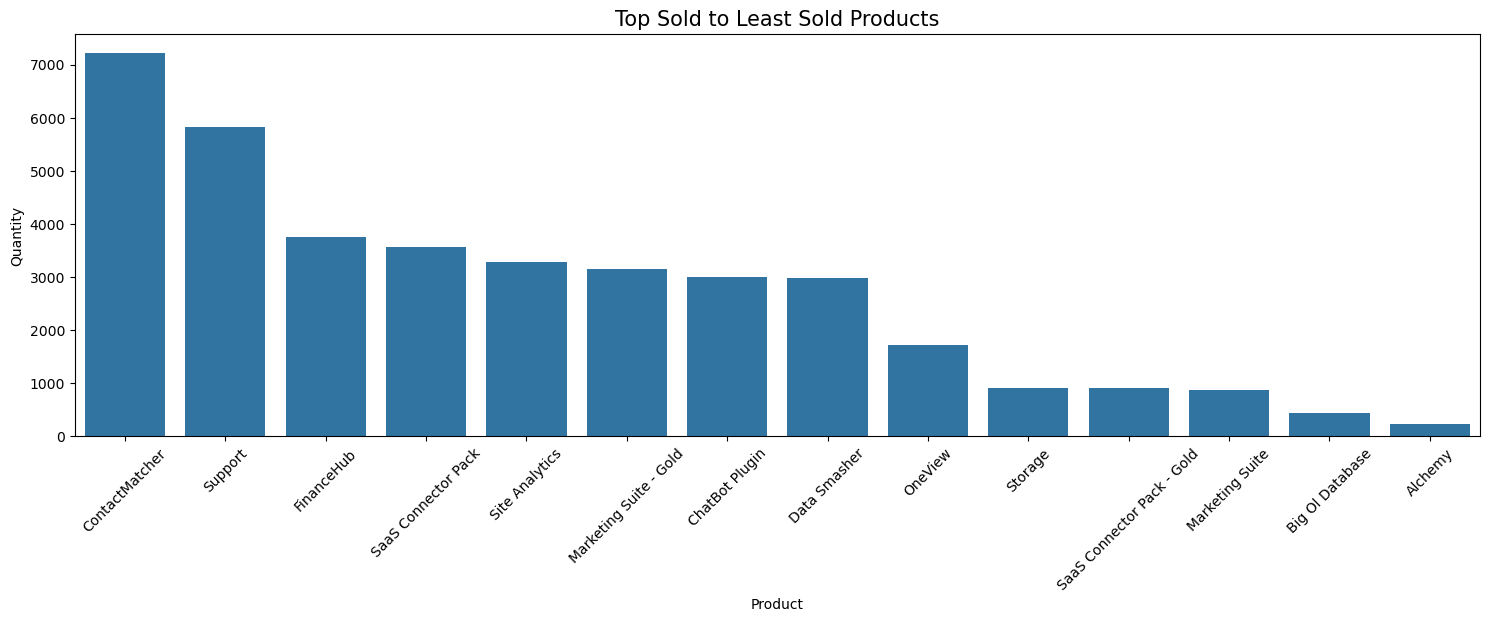

In [19]:
sold_products = df.groupby("Product")["Quantity"].sum().reset_index()
top_sold = sold_products.sort_values(by = "Quantity", ascending = False)

plt.figure(figsize = (15,5))
sns.barplot(data = top_sold, x = "Product", y = "Quantity")
plt.title("Top Sold to Least Sold Products", size = 15)
plt.xlabel("Product", size = 10)
plt.ylabel("Quantity", size = 10)
plt.tight_layout()
plt.xticks(rotation = 45)
plt.show()

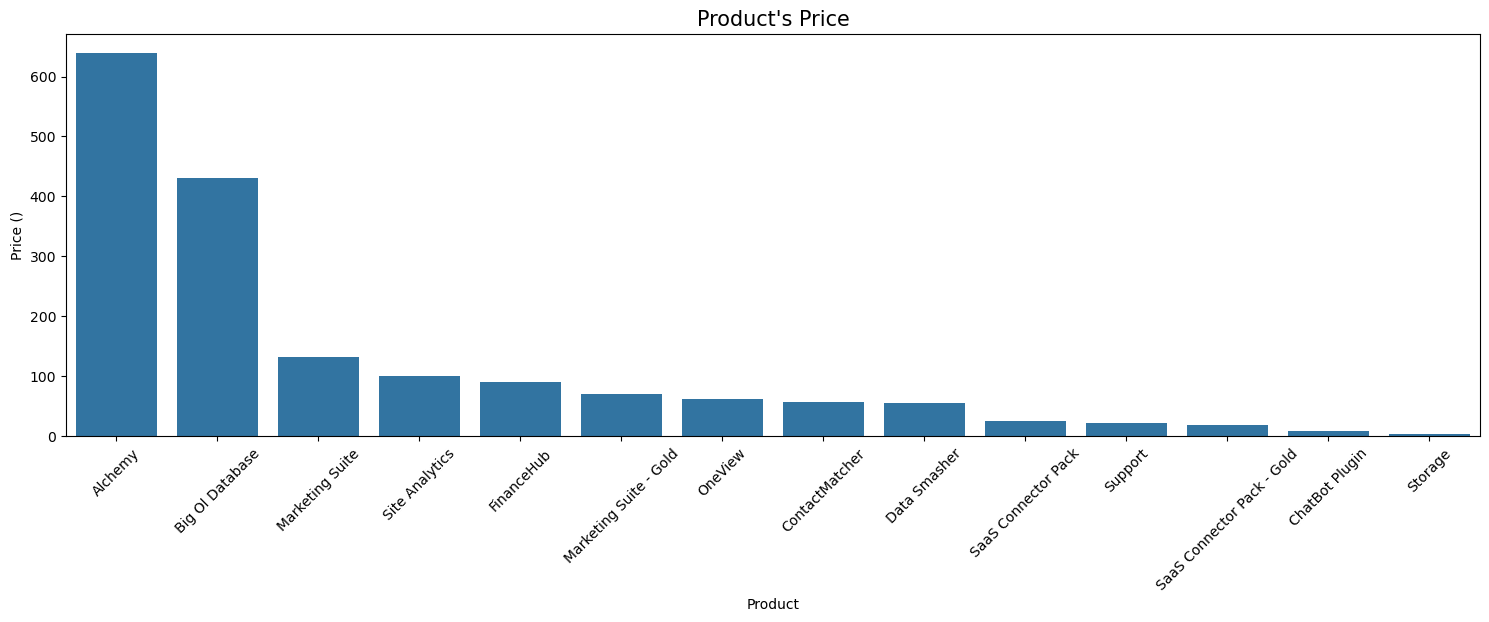

In [20]:
price = df.groupby("Product")[["Sales", "Quantity"]].sum().reset_index()
price["Price per Product"] = price["Sales"] / price["Quantity"]
price = price.sort_values(by = "Price per Product", ascending = False)

plt.figure(figsize = (15,5))
sns.barplot(data = price, x = "Product", y = "Price per Product")
plt.title("Product's Price", size = 15)
plt.xlabel("Product", size = 10)
plt.ylabel("Price ()", size = 10)
plt.tight_layout()
plt.xticks(rotation = 45)
plt.show()

In [21]:
product_functionality = {
    'Alchemy': 'Workflow Management',
    'Big Ol Database': 'Data Management & Storage',
    'Marketing Suite': 'Marketing & Campaign Tools',
    'Site Analytics': 'Website Analytics',
    'FinanceHub': 'Budget Planning',
    'Marketing Suite - Gold': 'Marketing & Campaign Tools',
    'OneView': 'Data Visualization',
    'ContactMatcher': 'Customer Engagement',
    'Data Smasher': 'Data Management & Storage',
    'SaaS Connector Pack': 'Connectivity & Integration',
    'Support': 'Customer Service',
    'SaaS Connector Pack - Gold': 'Connectivity & Integration',
    'ChatBot Plugin': 'Customer Engagement',
    'Storage': 'Data Management & Storage'
}

# Add a new column 'Functionality' to the dataframe
df['Functionality'] = df['Product'].map(product_functionality)

# Display the updated dataframe
df.tail()

,Order ID,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit,Day,Month,Year,Functionality
9989,EMEA-2020-110422,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.248,3,0.2,4.1028,22,1,2020,Connectivity & Integration
9990,AMER-2023-121258,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.960,2,0.0,15.6332,27,2,2023,Connectivity & Integration
9991,AMER-2023-121258,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.576,2,0.2,19.3932,27,2,2023,Website Analytics
9992,AMER-2023-121258,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.600,4,0.0,13.3200,27,2,2023,Customer Service
9993,AMER-2023-119914,Jasmine Springer,United States,Dallas,AMER,NAMER,Comcast,1022,Communications,SMB,OneView,3NTBV9B3PS,243.160,2,0.0,72.9480,5,5,2023,Data Visualization


In [22]:
product_functionality_group = df.groupby(["Product", "Functionality"]).size().reset_index(name='Count')
product_functionality_group

,Product,Functionality,Count
0,Alchemy,Workflow Management,68
1,Big Ol Database,Data Management & Storage,115
2,ChatBot Plugin,Customer Engagement,796
3,ContactMatcher,Customer Engagement,1842
4,Data Smasher,Data Management & Storage,775
5,FinanceHub,Budget Planning,981
6,Marketing Suite,Marketing & Campaign Tools,228
7,Marketing Suite - Gold,Marketing & Campaign Tools,846
8,OneView,Data Visualization,466
9,SaaS Connector Pack,Connectivity & Integration,957


In [23]:
Q1_products = top_sold["Quantity"].quantile(0.35)
Q2_products = top_sold["Quantity"].quantile(0.75)

top_sold["Category"] = pd.cut(top_sold["Quantity"],
                              bins=[-float('inf'), Q1_products, Q2_products, float('inf')],
                              labels=['Low', 'Medium', 'High'])

In [53]:
sold_products = df.groupby("Product")["Sales"].sum().reset_index()
top_sales = sold_products.sort_values(by = "Sales", ascending = False)

Q1_products = top_sales["Sales"].quantile(0.35)
Q2_products = top_sales["Sales"].quantile(0.75)

top_sales["Category"] = pd.cut(top_sales["Sales"],
                              bins=[-float('inf'), Q1_products, Q2_products, float('inf')],
                              labels = ['Low', 'Medium', 'High'])

In [54]:
sold_products = df.groupby("Product")["Profit"].sum().reset_index()
top_profit = sold_products.sort_values(by = "Profit", ascending = False)

Q1_products = top_profit["Profit"].quantile(0.35)
Q2_products = top_profit["Profit"].quantile(0.75)

top_profit["Category"] = pd.cut(top_profit["Profit"],
                              bins=[-float('inf'), Q1_products, Q2_products, float('inf')],
                              labels = ['Low', 'Medium', 'High'])

In [56]:
top_sold_sales = top_sold.merge(top_sales, on = "Product")
top = top_sold_sales.merge(top_profit, on = "Product")
low = top.sort_values(by = ["Category_x", "Category_y", "Category"], ascending = False)
low.tail(2)

,Product,Quantity,Category_x,Sales,Category_y,Profit,Category
9,Storage,914,Low,3024.280,Low,949.5182,Low
10,SaaS Connector Pack - Gold,906,Low,16476.402,Low,6964.1767,Low


In [57]:
low_df = df[(df["Product"] == "Storage") |
            (df["Product"] == "SaaS Connector Pack - Gold") ]

In [58]:
emea_1 = low_df[(low_df['Region'] == 'EMEA') & (low_df['Discount'] > 0)]
emea_disc_1 = emea_1.groupby("Product")["Quantity"].sum().reset_index()

emea_0 = low_df[(low_df['Region'] == 'EMEA') & (low_df['Discount'] == 0)]
emea_disc_0 = emea_0.groupby("Product")["Quantity"].sum().reset_index()

display(emea_disc_0, emea_disc_1)

,Product,Quantity
0,SaaS Connector Pack - Gold,251
1,Storage,186


,Product,Quantity
0,SaaS Connector Pack - Gold,165
1,Storage,146


**Hyphotesis**

**H0** : There is no significant relationship between the region (EMEA, AMER, APJ) and the application of discounts (Discount > 0 vs Discount == 0).
<br>
**H1** : There is a significant relationship between the region and the application of discounts. Also means that at least one region has a different proportion of discounts compared to the others.

In [59]:
EMEA_disc = len(low_df[(low_df['Region'] == 'EMEA') & (low_df['Discount'] > 0)])
EMEA_disc2 = len(low_df[(low_df['Region'] == 'EMEA') & (low_df['Discount'] == 0)])
AMER_disc = len(low_df[(low_df['Region'] == 'AMER') & (low_df['Discount'] > 0)])
AMER_disc2 = len(low_df[(low_df['Region'] == 'AMER') & (low_df['Discount'] == 0)])
APJ_disc = len(low_df[(low_df['Region'] == 'APJ') & (low_df['Discount'] > 0)])
APJ_disc2 = len(low_df[(low_df['Region'] == 'APJ') & (low_df['Discount'] == 0)])

contingency_table = np.array([[EMEA_disc, EMEA_disc2], [AMER_disc, AMER_disc2], [APJ_disc, APJ_disc2]])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print('Chi-Square Statistic:', chi2)
print('P-Value:', p)

if p < 0.05:
    print('Reject H0\nThere is a significant relationship between the region and the application of discounts')
else:
    print('Fail to Reject H0\nThere is no significant relationship between the region (EMEA, AMER, APJ)')

Chi-Square Statistic: 71.9086469705861
P-Value: 2.427927475301403e-16
Reject H0
There is a significant relationship between the region and the application of discounts


In [60]:
emea_1 = low_df[(low_df['Region'] == 'EMEA') & (low_df['Discount'] > 0)]
emea_disc_1 = emea_1.groupby("Product")["Quantity"].sum().reset_index()

emea_0 = low_df[(low_df['Region'] == 'EMEA') & (low_df['Discount'] == 0)]
emea_disc_0 = emea_0.groupby("Product")["Quantity"].sum().reset_index()

print(f"Quantity sold if no discount :\n{emea_disc_0}\n\nQuantity sold if there is discount :\n{emea_disc_1}")

Quantity sold if no discount :
                      Product  Quantity
0  SaaS Connector Pack - Gold       251
1                     Storage       186

Quantity sold if there is discount :
                      Product  Quantity
0  SaaS Connector Pack - Gold       165
1                     Storage       146


In [61]:
amer_1 = low_df[(low_df['Region'] == 'AMER') & (low_df['Discount'] > 0)]
amer_disc_1 = amer_1.groupby("Product")["Quantity"].sum().reset_index()

amer_0 = low_df[(low_df['Region'] == 'AMER') & (low_df['Discount'] == 0)]
amer_disc_0 = amer_0.groupby("Product")["Quantity"].sum().reset_index()

print(f"Quantity sold if no discount :\n{amer_disc_0}\n\nQuantity sold if there is discount :\n{amer_disc_1}")

Quantity sold if no discount :
                      Product  Quantity
0  SaaS Connector Pack - Gold       208
1                     Storage       279

Quantity sold if there is discount :
                      Product  Quantity
0  SaaS Connector Pack - Gold        66
1                     Storage       106


In [62]:
apj_1 = low_df[(low_df['Region'] == 'APJ') & (low_df['Discount'] > 0)]
apj_disc_1 = apj_1.groupby("Product")["Quantity"].sum().reset_index()

apj_0 = low_df[(low_df['Region'] == 'APJ') & (low_df['Discount'] == 0)]
apj_disc_0 = apj_0.groupby("Product")["Quantity"].sum().reset_index()

print(f"Quantity sold if no discount :\n{apj_disc_0}\n\nQuantity sold if there is discount :\n{apj_disc_1}")

Quantity sold if no discount :
                      Product  Quantity
0  SaaS Connector Pack - Gold        89
1                     Storage        39

Quantity sold if there is discount :
                      Product  Quantity
0  SaaS Connector Pack - Gold       127
1                     Storage       158


In [64]:
products = ["Storage", "SaaS Connector Pack - Gold"]
for product in products:
    product_df = df[df["Product"] == product]
    emea_disc_mode = product_df[product_df['Region'] == 'EMEA']['Discount'].mode()
    amer_disc_mode = product_df[product_df['Region'] == 'AMER']['Discount'].mode()
    apj_disc_mode = product_df[product_df['Region'] == 'APJ']['Discount'].mode()
    print(f"Mode Discount for {product} - EMEA Region: {emea_disc_mode[0] if not emea_disc_mode.empty else 'No Data'}")
    print(f"Mode Discount for {product} - AMER Region: {amer_disc_mode[0] if not amer_disc_mode.empty else 'No Data'}")
    print(f"Mode Discount for {product} - APJ Region: {apj_disc_mode[0] if not apj_disc_mode.empty else 'No Data'}\n")

Mode Discount for Storage - EMEA Region: 0.0
Mode Discount for Storage - AMER Region: 0.0
Mode Discount for Storage - APJ Region: 0.2

Mode Discount for SaaS Connector Pack - Gold - EMEA Region: 0.0
Mode Discount for SaaS Connector Pack - Gold - AMER Region: 0.0
Mode Discount for SaaS Connector Pack - Gold - APJ Region: 0.2



In [65]:
regions = ['EMEA', 'AMER', 'APJ']
total = len(low_df['Region'])
for region in regions:
    region_count = len(low_df[low_df['Region'] == region])
    region_rate = region_count / total
    print(f"Proportion of {region} region is: {region_rate}")

Proportion of EMEA region is: 0.4140127388535032
Proportion of AMER region is: 0.37154989384288745
Proportion of APJ region is: 0.21443736730360935


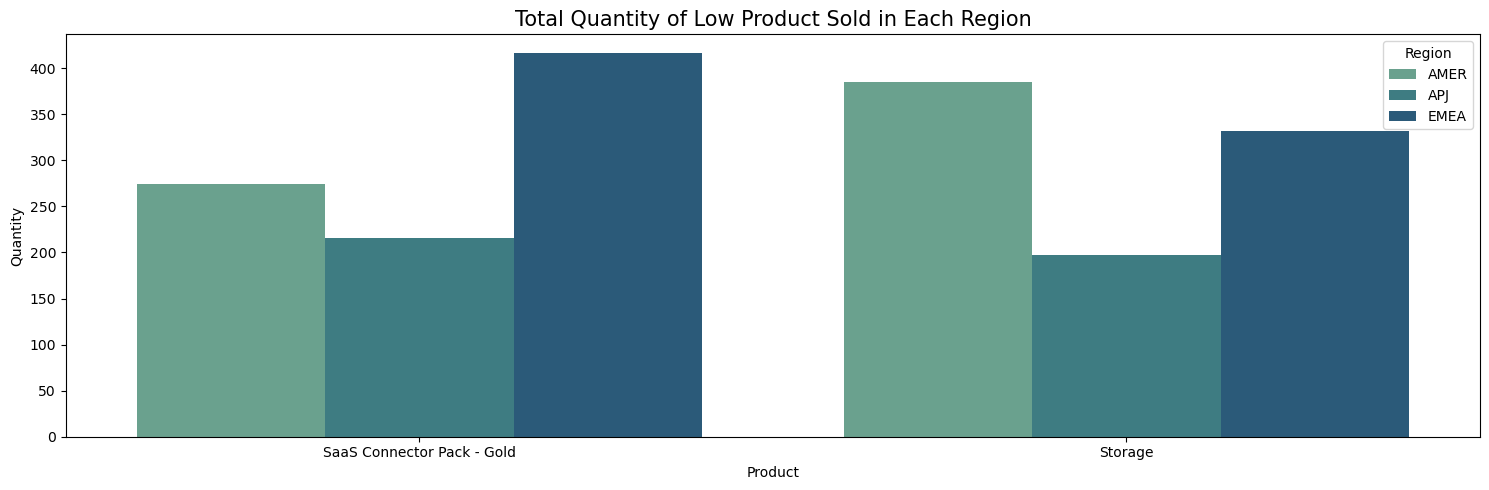

In [66]:
low_product_sales = low_df.groupby(["Region", "Product"])["Quantity"].sum().reset_index()
low_product_sales = low_product_sales.sort_values(by = ["Region", "Product", "Quantity"])

plt.figure(figsize=(15, 5))
sns.barplot(data=low_product_sales, x="Product", y="Quantity", hue="Region", palette='crest')
plt.title("Total Quantity of Low Product Sold in Each Region", size=15)
plt.xlabel("Product", size=10)
plt.ylabel("Quantity", size=10)
plt.tight_layout()
plt.show()

### **Possible factors that can lead to low sales performance :**

| No. | Factors | Explanation |
|-----|---------|-------------|
| 1. | **Unstable Stock Availability** | Since data about stock each products are not given, therefore assuming products are often unavailable or there are supply chain issues, customers may turn to competitors. |
| 2. | **Low Customer Satisfaction** | Since data about customer satisfaction are not given, therefore assuming there migh be a poor customer service or an unsatisfactory user experience can lead to the loss of potential or existing customers. |
| 3. | **Inadequate Product Quality** | Products that do not meet customer expectations or have poor quality can lead to low buyer interest. |
| 4. | **Product Similarity** | Similarity in product functionality without distinct features. |
| 5. | **High Prices** | The product Big Ol Database has a higher price, which leads to fewer sales across all regions compared to Storage. Similarly, for the SaaS Connector Gold Pack, customers prefer to buy the SaaS Connector Pack because it is more affordable. |

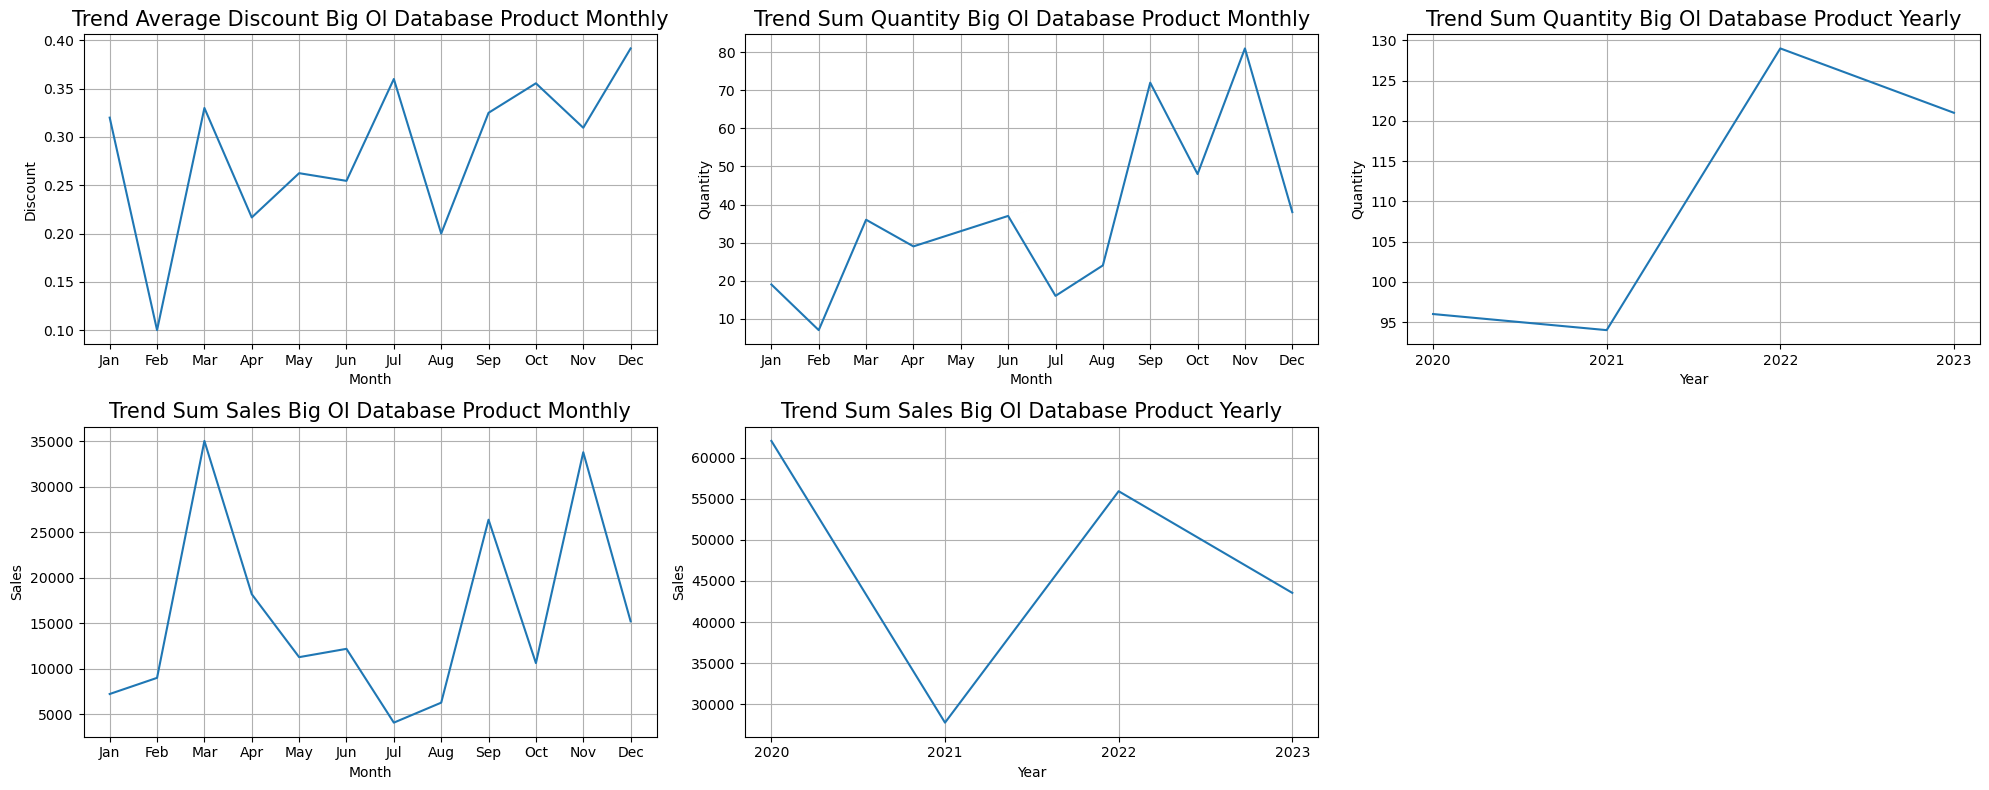

In [36]:
big_database = df[df["Product"] == "Big Ol Database"]

# avg discount
avg_discount = big_database.groupby("Month")["Discount"].mean().reset_index()
avg_discount["Month"] = avg_discount["Month"].apply(lambda x: calendar.month_abbr[x])

# total quantity sold monthly
month_quantity = big_database.groupby("Month")["Quantity"].sum().reset_index()
month_quantity["Month"] = month_quantity["Month"].apply(lambda x: calendar.month_abbr[x])

# total quantity sold yearly
year_quantity = big_database.groupby("Year")["Quantity"].sum().reset_index()
year_quantity["Year"] = year_quantity["Year"].astype(str)

# total sales sales monthly
month_sales = big_database.groupby("Month")["Sales"].sum().reset_index()
month_sales["Month"] = month_sales["Month"].apply(lambda x: calendar.month_abbr[x])

# total sales sales yearly
year_sales = big_database.groupby("Year")["Sales"].sum().reset_index()
year_sales["Year"] = year_sales["Year"].astype(str)

# Plot
fig, axes = plt.subplots(2, 3, figsize=(20, 8))

sns.lineplot(data=avg_discount, x="Month", y="Discount", ax=axes[0, 0])
axes[0, 0].set_title("Trend Average Discount Big Ol Database Product Monthly", size=15)
axes[0, 0].set_xticklabels(avg_discount["Month"])
axes[0, 0].grid(True)

sns.lineplot(data=month_quantity, x="Month", y="Quantity", ax=axes[0, 1])
axes[0, 1].set_title("Trend Sum Quantity Big Ol Database Product Monthly", size=15)
axes[0, 1].set_xticklabels(month_quantity["Month"])
axes[0, 1].grid(True)

sns.lineplot(data=year_quantity, x="Year", y="Quantity", ax=axes[0, 2])
axes[0, 2].set_title("Trend Sum Quantity Big Ol Database Product Yearly", size=15)
axes[0, 2].set_xticks(range(len(year_quantity)))
axes[0, 2].set_xticklabels(year_quantity["Year"])
axes[0, 2].grid(True)

sns.lineplot(data=month_sales, x="Month", y="Sales", ax=axes[1, 0])
axes[1, 0].set_title("Trend Sum Sales Big Ol Database Product Monthly", size=15)
axes[1, 0].set_xticklabels(month_sales["Month"])
axes[1, 0].grid(True)

sns.lineplot(data=year_sales, x="Year", y="Sales", ax=axes[1, 1])
axes[1, 1].set_title("Trend Sum Sales Big Ol Database Product Yearly", size=15)
axes[1, 1].set_xticks(range(len(year_sales)))
axes[1, 1].set_xticklabels(year_sales["Year"])
axes[1, 1].grid(True)

axes[1, 2].axis('off')
plt.tight_layout()
plt.show()

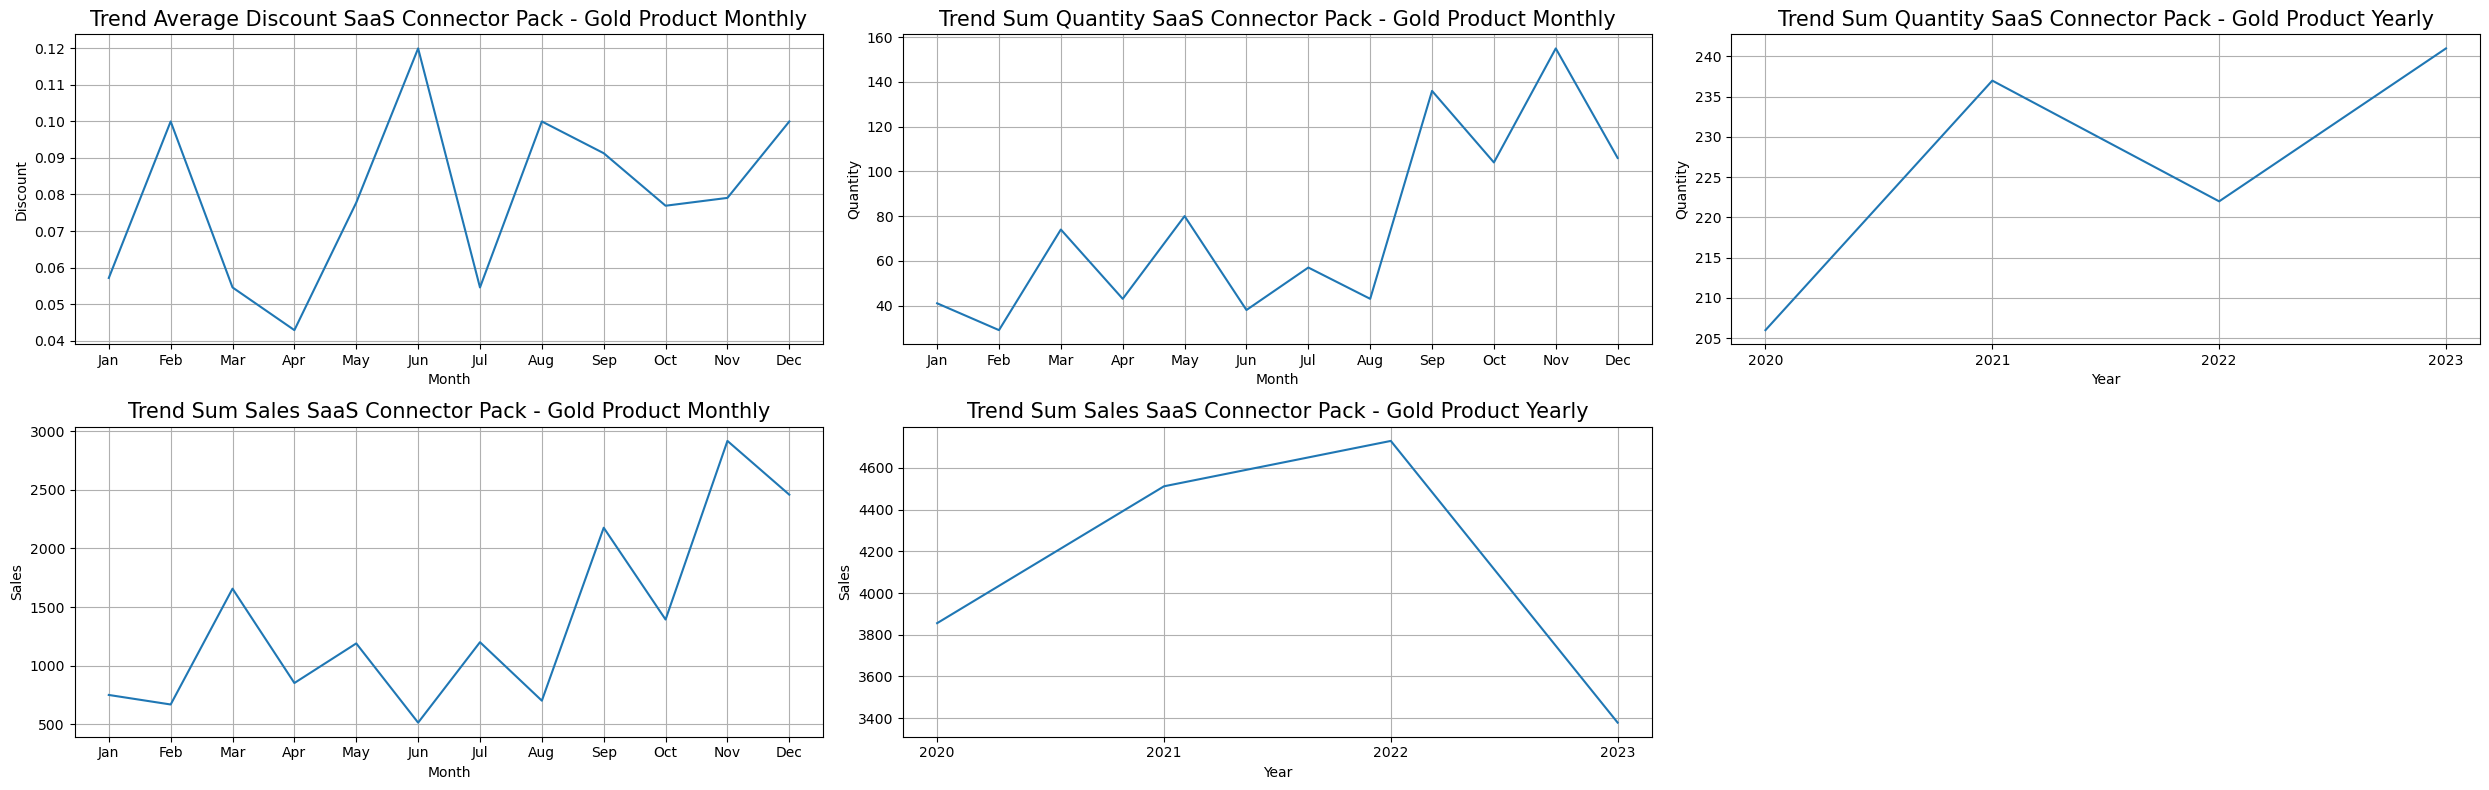

In [37]:
gold_connector = df[df["Product"] == "SaaS Connector Pack - Gold"]

# avg discount
avg_discount = gold_connector.groupby("Month")["Discount"].mean().reset_index()
avg_discount["Month"] = avg_discount["Month"].apply(lambda x: calendar.month_abbr[x])

# total quantity sold monthly
month_quantity = gold_connector.groupby("Month")["Quantity"].sum().reset_index()
month_quantity["Month"] = month_quantity["Month"].apply(lambda x: calendar.month_abbr[x])

# total quantity sold yearly
year_quantity = gold_connector.groupby("Year")["Quantity"].sum().reset_index()
year_quantity["Year"] = year_quantity["Year"].astype(str)

# total sales sales monthly
month_sales = gold_connector.groupby("Month")["Sales"].sum().reset_index()
month_sales["Month"] = month_sales["Month"].apply(lambda x: calendar.month_abbr[x])

# total sales sales yearly
year_sales = gold_connector.groupby("Year")["Sales"].sum().reset_index()
year_sales["Year"] = year_sales["Year"].astype(str)

# Plot
fig, axes = plt.subplots(2, 3, figsize=(25, 8))

sns.lineplot(data=avg_discount, x="Month", y="Discount", ax=axes[0, 0])
axes[0, 0].set_title("Trend Average Discount SaaS Connector Pack - Gold Product Monthly", size=15)
axes[0, 0].set_xticklabels(avg_discount["Month"])
axes[0, 0].grid(True)

sns.lineplot(data=month_quantity, x="Month", y="Quantity", ax=axes[0, 1])
axes[0, 1].set_title("Trend Sum Quantity SaaS Connector Pack - Gold Product Monthly", size=15)
axes[0, 1].set_xticklabels(month_quantity["Month"])
axes[0, 1].grid(True)

sns.lineplot(data=year_quantity, x="Year", y="Quantity", ax=axes[0, 2])
axes[0, 2].set_title("Trend Sum Quantity SaaS Connector Pack - Gold Product Yearly", size=15)
axes[0, 2].set_xticks(range(len(year_quantity)))
axes[0, 2].set_xticklabels(year_quantity["Year"])
axes[0, 2].grid(True)

sns.lineplot(data=month_sales, x="Month", y="Sales", ax=axes[1, 0])
axes[1, 0].set_title("Trend Sum Sales SaaS Connector Pack - Gold Product Monthly", size=15)
axes[1, 0].set_xticklabels(month_sales["Month"])
axes[1, 0].grid(True)

sns.lineplot(data=year_sales, x="Year", y="Sales", ax=axes[1, 1])
axes[1, 1].set_title("Trend Sum Sales SaaS Connector Pack - Gold Product Yearly", size=15)
axes[1, 1].set_xticks(range(len(year_sales)))
axes[1, 1].set_xticklabels(year_sales["Year"])
axes[1, 1].grid(True)

axes[1, 2].axis('off')
plt.tight_layout()
plt.show()

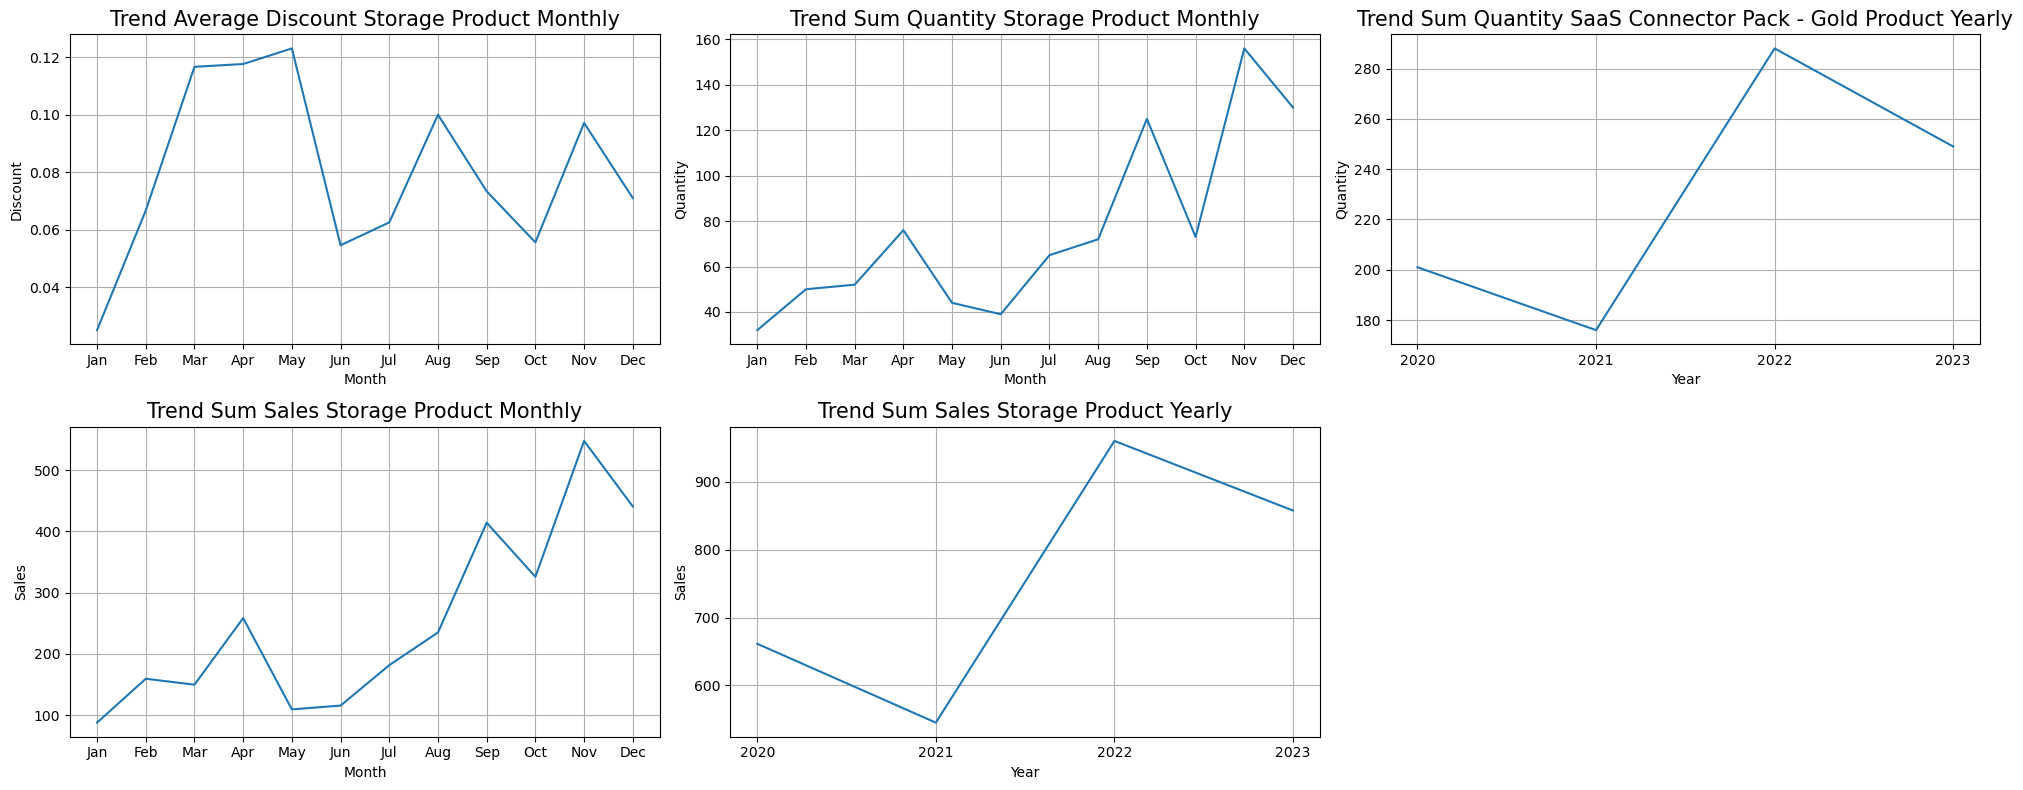

In [38]:
storage = df[df["Product"] == "Storage"]

# avg discount
avg_discount = storage.groupby("Month")["Discount"].mean().reset_index()
avg_discount["Month"] = avg_discount["Month"].apply(lambda x: calendar.month_abbr[x])

# total quantity sold monthly
month_quantity = storage.groupby("Month")["Quantity"].sum().reset_index()
month_quantity["Month"] = month_quantity["Month"].apply(lambda x: calendar.month_abbr[x])

# total quantity sold yearly
year_quantity = storage.groupby("Year")["Quantity"].sum().reset_index()
year_quantity["Year"] = year_quantity["Year"].astype(str)

# total sales sales monthly
month_sales = storage.groupby("Month")["Sales"].sum().reset_index()
month_sales["Month"] = month_sales["Month"].apply(lambda x: calendar.month_abbr[x])

# total sales sales yearly
year_sales = storage.groupby("Year")["Sales"].sum().reset_index()
year_sales["Year"] = year_sales["Year"].astype(str)

# Plot
fig, axes = plt.subplots(2, 3, figsize=(20, 8))

sns.lineplot(data=avg_discount, x="Month", y="Discount", ax=axes[0, 0])
axes[0, 0].set_title("Trend Average Discount Storage Product Monthly", size=15)
axes[0, 0].set_xticklabels(avg_discount["Month"])
axes[0, 0].grid(True)

sns.lineplot(data=month_quantity, x="Month", y="Quantity", ax=axes[0, 1])
axes[0, 1].set_title("Trend Sum Quantity Storage Product Monthly", size=15)
axes[0, 1].set_xticklabels(month_quantity["Month"])
axes[0, 1].grid(True)

sns.lineplot(data=year_quantity, x="Year", y="Quantity", ax=axes[0, 2])
axes[0, 2].set_title("Trend Sum Quantity SaaS Connector Pack - Gold Product Yearly", size=15)
axes[0, 2].set_xticks(range(len(year_quantity)))
axes[0, 2].set_xticklabels(year_quantity["Year"])
axes[0, 2].grid(True)

sns.lineplot(data=month_sales, x="Month", y="Sales", ax=axes[1, 0])
axes[1, 0].set_title("Trend Sum Sales Storage Product Monthly", size=15)
axes[1, 0].set_xticklabels(month_sales["Month"])
axes[1, 0].grid(True)

sns.lineplot(data=year_sales, x="Year", y="Sales", ax=axes[1, 1])
axes[1, 1].set_title("Trend Sum Sales Storage Product Yearly", size=15)
axes[1, 1].set_xticks(range(len(year_sales)))
axes[1, 1].set_xticklabels(year_sales["Year"])
axes[1, 1].grid(True)

axes[1, 2].axis('off')
plt.tight_layout()
plt.show()

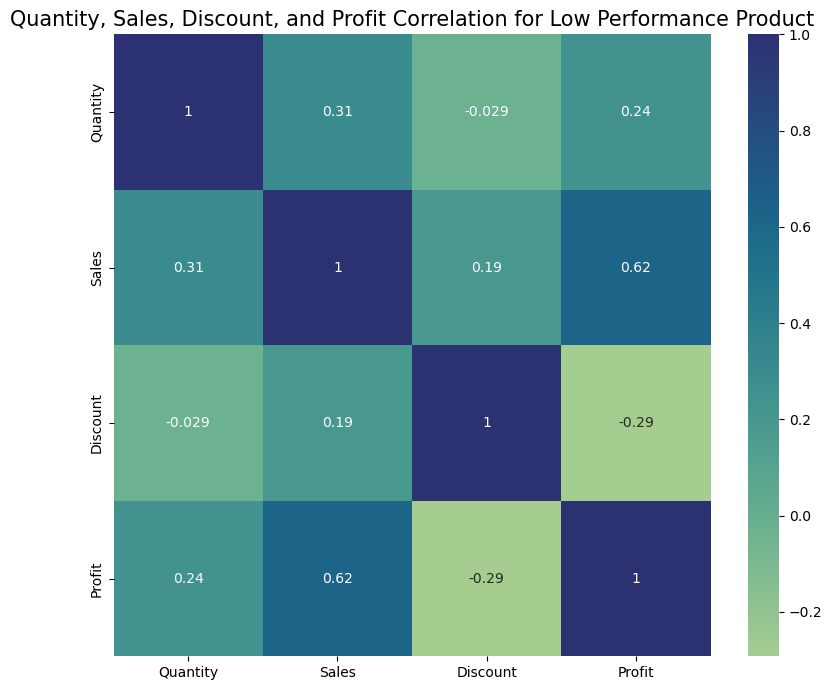

In [39]:
corr_matrix = low_df[["Quantity", "Sales", "Discount", "Profit"]].corr(method = "spearman")
plt.figure(figsize = (8,7))
sns.heatmap(data = corr_matrix, annot = True, cmap = crest)
plt.title("Quantity, Sales, Discount, and Profit Correlation for Low Performance Product", size = 15)
plt.tight_layout()
plt.show()

### **Trend Interpretaion for Each Product** 

| **Product Name** | **Interpretation** |
|------------------|-------------------|
| **Big Ol Database** | The average discount trend is relatively stable with slight increases around March and November, but drops sharply in February and June. Offering a higher discount might boost sales and quantities sold, but the effect is not always consistent throughout the year. <br><br>Quantity and sales show spikes in March, August, and October, but the overall performance is inconsistent, indicating fluctuations in demand throughout the year. <br><br>Yearly quantity and sales trends indicate improvement in 2021, but a decline in subsequent years. This suggests that Big Ol Database may struggle with maintaining steady growth, possibly due to market competition or pricing issues. |
| **SaaS Connector Pack - Gold** | Average discount varies significantly month to month, with peaks in June and drops in April, indicating inconsistent promotional strategies. The effect of discounts on sales and quantity is less clear, as the growth is observed in November without significant changes in discount levels.<br><br>Monthly quantity and sales trends show growth around November, but the pattern is irregular, reflecting unstable demand. <br><br>Yearly trends indicate fluctuating sales, with a dip in 2022 and recovery in 2023. The higher pricing of the gold version could  |
| **Storage** | Average discount shows peaks in March and remains moderate throughout the year, but there is a drop in June and consistent discounts thereafter. The discount strategy does not seem to have a straightforward impact on boosting sales consistently, which might indicate that customer preference for this product is less sensitive to discount variations.<br><br>Monthly quantity and sales show growth in April, August, and peaks in November, but lower volumes compared to other products, suggesting limited interest. <br><br>The yearly trend displays growth in 2021, but declines in subsequent years, pointing to difficulty competing in a highly competitive storage market due to pricing or lack of distinguishing features. |


### **Recommendation For Low Performance Product** 

# <span style="color:darkgreen">Potential Buyer</span>

In [40]:
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])
today_date = dt.datetime(2024, 1, 1)

recency = df.groupby('Customer').agg({'Date': lambda x: (today_date - x.max()).days}).reset_index()
recency.columns = ['Customer', 'Recency']

# Menghitung Frequency: Jumlah total pembelian setiap pelanggan
frequency = df.groupby('Customer').agg({'Order ID': 'count'}).reset_index()
frequency.columns = ['Customer', 'Frequency']

# Menghitung Monetary: Total nilai pembelian setiap pelanggan
monetary = df.groupby('Customer').agg({'Sales': 'sum'}).reset_index()
monetary.columns = ['Customer', 'Monetary']

# Menggabungkan semua data menjadi satu DataFrame
rfm = recency.merge(frequency, on='Customer').merge(monetary, on='Customer')

In [41]:
# Rank Recency, Frequency, and Monetary values
rfm['R_Score'] = pd.qcut(rfm['Recency'].rank(method='first'), 5, labels=[5, 4, 3, 2, 1])
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])
rfm['M_Score'] = pd.qcut(rfm['Monetary'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])

rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

In [42]:
def segment_customer(rfm):
    if rfm['RFM_Score'] == '555':
        return 'Champions'
    elif rfm['R_Score'] in [4, 5] and rfm['F_Score'] in [4, 5] and rfm['M_Score'] in [3, 4, 5]:
        return 'Loyal Customers'
    elif rfm['R_Score'] in [4, 5] and rfm['F_Score'] in [1, 2]:
        return 'Potential Loyalists'
    elif rfm['R_Score'] in [3, 4, 5] and rfm['F_Score'] in [1, 2]:
        return 'Need Attention'
    elif rfm['R_Score'] in [1, 2] and rfm['F_Score'] in [1, 2]:
        return 'Hibernating'
    else:
        return 'Others'
    
rfm['Segment'] = rfm.apply(segment_customer, axis=1)
rfm[['Customer', 'RFM_Score', 'Segment']]

,Customer,RFM_Score,Segment
0,AT&T,354,Others
1,Abbott Laboratories,311,Need Attention
2,Aetna,254,Others
3,Airbus,244,Others
4,Allianz,555,Champions
...,...,...,...
94,Volkswagen,255,Others
95,Walgreens,222,Hibernating
96,Walmart,243,Others
97,Walt Disney,234,Others


In [43]:
rfm = rfm[rfm["Segment"].isin(['Champions', 'Loyal Customers', 'Potential Loyalists'])]
rfm = rfm.sort_values(by = "Segment", ascending = True)
rfm

,Customer,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Segment
4,Allianz,2,192,42904.1670,5,5,5,555,Champions
14,BNP Paribas,3,156,37543.7998,5,5,5,555,Champions
62,Mondelez International,3,143,32993.0458,5,5,5,555,Champions
89,Tyson Foods,1,184,40326.3440,5,5,5,555,Champions
77,Royal Dutch Shell,3,108,24689.1270,5,4,4,544,Loyal Customers
76,Prudential Financial,6,154,20946.2124,4,5,3,453,Loyal Customers
73,Philip Morris International,7,115,21383.0630,4,4,3,443,Loyal Customers
67,Oracle,7,110,21195.1780,4,4,3,443,Loyal Customers
63,Morgan Stanley,1,126,28631.4500,5,4,4,544,Loyal Customers
56,Lukoil,3,116,35199.1830,5,4,5,545,Loyal Customers


In [44]:
low_df['Date'] = pd.to_datetime(low_df[['Year', 'Month', 'Day']])
today_date = dt.datetime(2024, 1, 1)

recency = low_df.groupby('Customer').agg({'Date': lambda x: (today_date - x.max()).days}).reset_index()
recency.columns = ['Customer', 'Recency']

# Menghitung Frequency: Jumlah total pembelian setiap pelanggan
frequency = low_df.groupby('Customer').agg({'Order ID': 'count'}).reset_index()
frequency.columns = ['Customer', 'Frequency']

# Menghitung Monetary: Total nilai pembelian setiap pelanggan
monetary = low_df.groupby('Customer').agg({'Sales': 'sum'}).reset_index()
monetary.columns = ['Customer', 'Monetary']

# Menggabungkan semua data menjadi satu DataFrame
rfm_lowdf = recency.merge(frequency, on='Customer').merge(monetary, on='Customer')

In [45]:
# Rank Recency, Frequency, and Monetary values
rfm_lowdf['R_Score'] = pd.qcut(rfm_lowdf['Recency'].rank(method='first'), 5, labels=[5, 4, 3, 2, 1])
rfm_lowdf['F_Score'] = pd.qcut(rfm_lowdf['Frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])
rfm_lowdf['M_Score'] = pd.qcut(rfm_lowdf['Monetary'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])
rfm_lowdf['RFM_Score'] = rfm_lowdf['R_Score'].astype(str) + rfm_lowdf['F_Score'].astype(str) + rfm_lowdf['M_Score'].astype(str)

In [46]:
def segment_customer(rfm_lowdf):
    if rfm_lowdf['RFM_Score'] == '555':
        return 'Champions'
    elif rfm_lowdf['R_Score'] in [4, 5] and rfm_lowdf['F_Score'] in [4, 5] and rfm_lowdf['M_Score'] in [3, 4, 5]:
        return 'Loyal Customers'
    elif rfm_lowdf['R_Score'] in [4, 5] and rfm_lowdf['F_Score'] in [1, 2]:
        return 'Potential Loyalists'
    elif rfm_lowdf['R_Score'] in [3, 4, 5] and rfm_lowdf['F_Score'] in [1, 2]:
        return 'Need Attention'
    elif rfm_lowdf['R_Score'] in [1, 2] and rfm_lowdf['F_Score'] in [1, 2]:
        return 'Hibernating'
    else:
        return 'Others'
    
rfm_lowdf['Segment'] = rfm_lowdf.apply(segment_customer, axis=1)
rfm_lowdf[['Customer', 'RFM_Score', 'Segment']]

,Customer,RFM_Score,Segment
0,AT&T,355,Others
1,Abbott Laboratories,322,Need Attention
2,Aetna,435,Others
3,Airbus,221,Hibernating
4,Allianz,553,Loyal Customers
...,...,...,...
93,Volkswagen,445,Loyal Customers
94,Walgreens,424,Potential Loyalists
95,Walmart,134,Others
96,Walt Disney,444,Loyal Customers


In [47]:
rfm_lowdf = rfm_lowdf[rfm_lowdf["Segment"].isin(['Champions', 'Loyal Customers', 'Potential Loyalists'])]
rfm_lowdf = rfm_lowdf.sort_values(by = "Segment", ascending = True)
rfm_lowdf

,Customer,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Segment
14,BNP Paribas,7,17,4962.387,5,5,5,555,Champions
4,Allianz,20,13,1135.692,5,5,3,553,Loyal Customers
55,Lukoil,30,11,4031.442,5,5,4,554,Loyal Customers
52,Johnson & Johnson,2,7,7555.858,5,4,5,545,Loyal Customers
50,Itochu,64,11,6401.836,4,5,5,455,Loyal Customers
46,HonHai Precision Industry,3,7,7046.175,5,4,5,545,Loyal Customers
96,Walt Disney,45,7,2824.348,4,4,4,444,Loyal Customers
70,Petrobras,37,8,1150.386,4,5,3,453,Loyal Customers
81,Sprint Nextel,6,10,902.395,5,5,3,553,Loyal Customers
88,Tyson Foods,1,14,1888.724,5,5,4,554,Loyal Customers


In [48]:
rfm.merge(rfm_lowdf, on = "Customer", how = "inner").sort_values(by = "Segment_y", ascending = True)

,Customer,Recency_x,Frequency_x,Monetary_x,R_Score_x,F_Score_x,M_Score_x,RFM_Score_x,Segment_x,Recency_y,Frequency_y,Monetary_y,R_Score_y,F_Score_y,M_Score_y,RFM_Score_y,Segment_y
1,BNP Paribas,3,156,37543.7998,5,5,5,555,Champions,7,17,4962.387,5,5,5,555,Champions
0,Allianz,2,192,42904.1670,5,5,5,555,Champions,20,13,1135.692,5,5,3,553,Loyal Customers
3,Tyson Foods,1,184,40326.3440,5,5,5,555,Champions,1,14,1888.724,5,5,4,554,Loyal Customers
4,Oracle,7,110,21195.1780,4,4,3,443,Loyal Customers,59,7,907.303,4,4,3,443,Loyal Customers
5,Lukoil,3,116,35199.1830,5,4,5,545,Loyal Customers,30,11,4031.442,5,5,4,554,Loyal Customers
6,Itochu,3,142,29886.8860,5,5,4,554,Loyal Customers,64,11,6401.836,4,5,5,455,Loyal Customers
7,Johnson & Johnson,2,132,29489.5720,5,4,4,544,Loyal Customers,2,7,7555.858,5,4,5,545,Loyal Customers
8,Comcast,3,161,25597.5700,5,5,4,554,Loyal Customers,6,8,487.140,5,5,3,553,Loyal Customers
13,HonHai Precision Industry,3,88,18457.4150,5,2,2,522,Potential Loyalists,3,7,7046.175,5,4,5,545,Loyal Customers
2,Mondelez International,3,143,32993.0458,5,5,5,555,Champions,13,4,205.496,5,2,2,522,Potential Loyalists


# <span style="color:darkgreen">Customer Preferences</span>

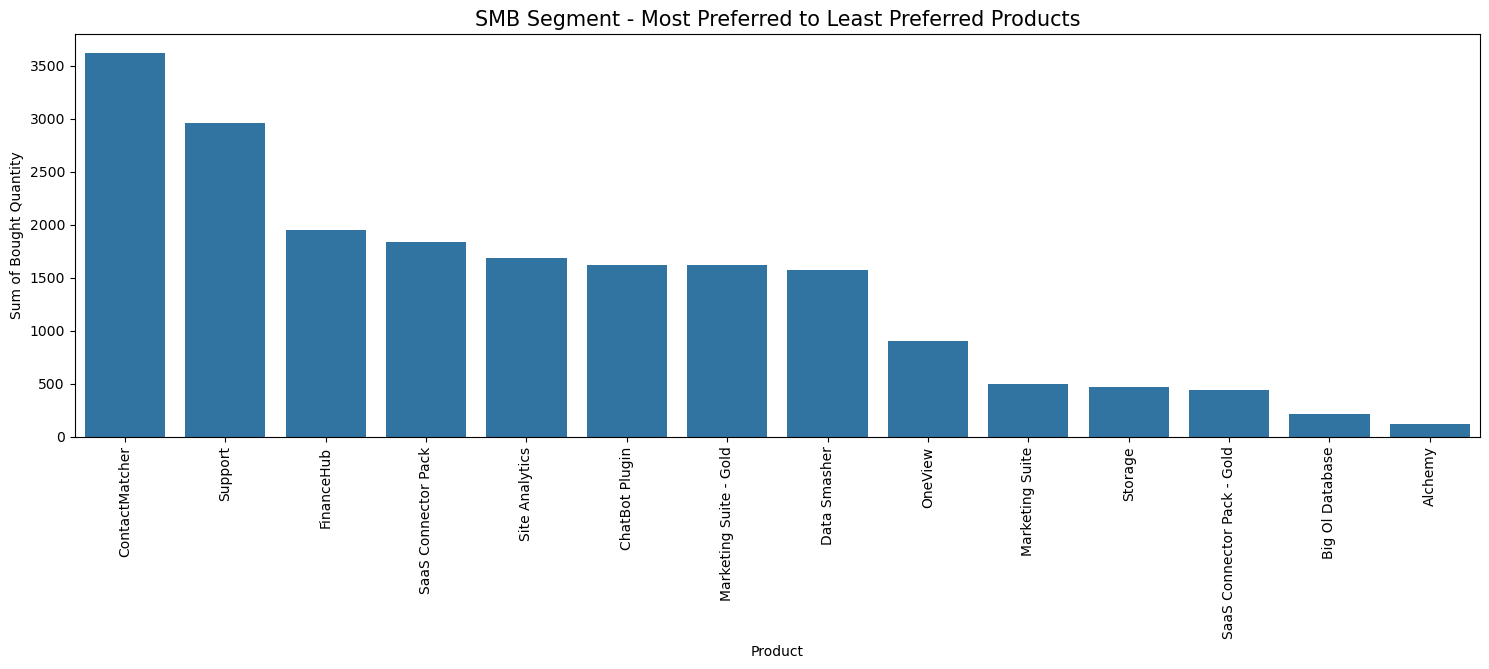

In [49]:
customer_preferences = df.groupby(["Segment", "Product"])["Quantity"].sum().reset_index()
smb_preferences = customer_preferences[customer_preferences["Segment"] == "SMB"].sort_values(by = "Quantity", ascending = False)

plt.figure(figsize = (15,5))
sns.barplot(data = smb_preferences, x = "Product", y = "Quantity")
plt.title("SMB Segment - Most Preferred to Least Preferred Products", size = 15)
plt.xlabel("Product", size = 10)
plt.ylabel("Sum of Bought Quantity", size = 10)
plt.tight_layout()
plt.xticks(rotation = 90)
plt.show()

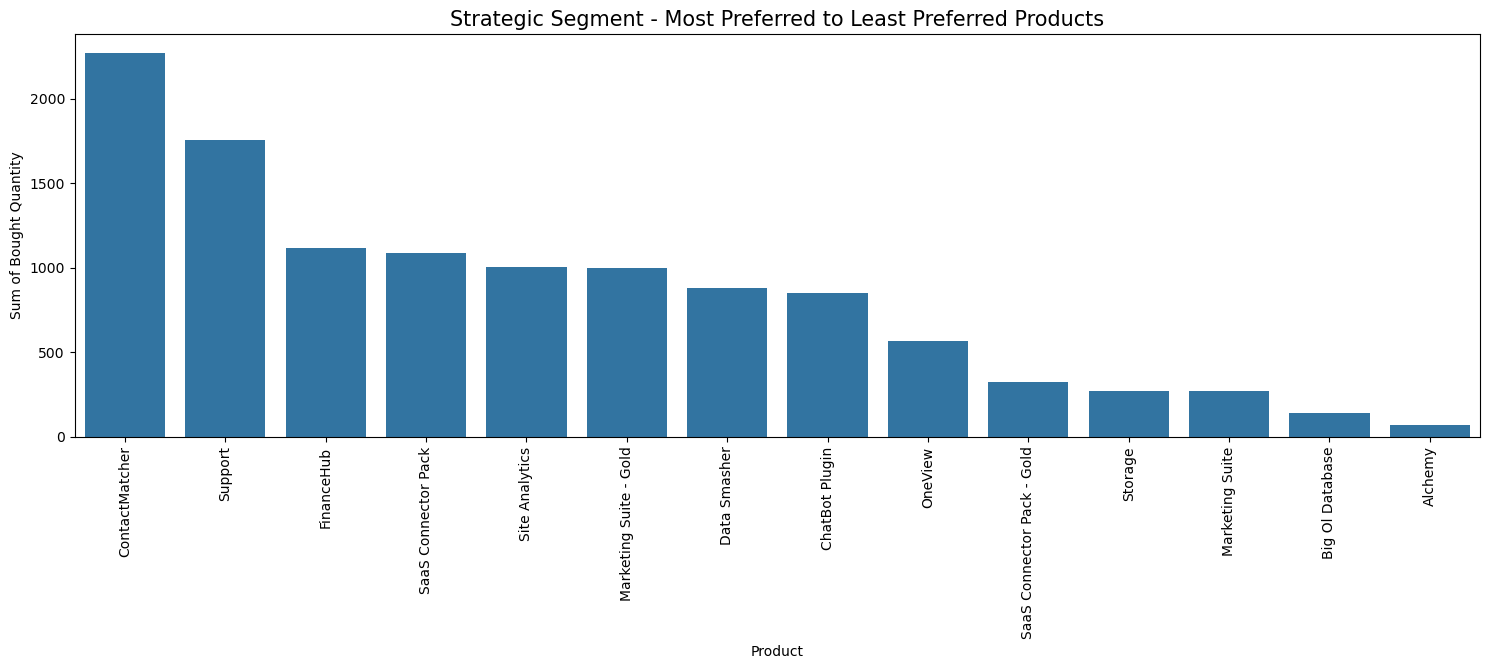

In [50]:
strategic_preferences = customer_preferences[customer_preferences["Segment"] == "Strategic"].sort_values(by = "Quantity", ascending = False)

plt.figure(figsize = (15,5))
sns.barplot(data = strategic_preferences, x = "Product", y = "Quantity")
plt.title("Strategic Segment - Most Preferred to Least Preferred Products", size = 15)
plt.xlabel("Product", size = 10)
plt.ylabel("Sum of Bought Quantity", size = 10)
plt.tight_layout()
plt.xticks(rotation = 90)
plt.show()

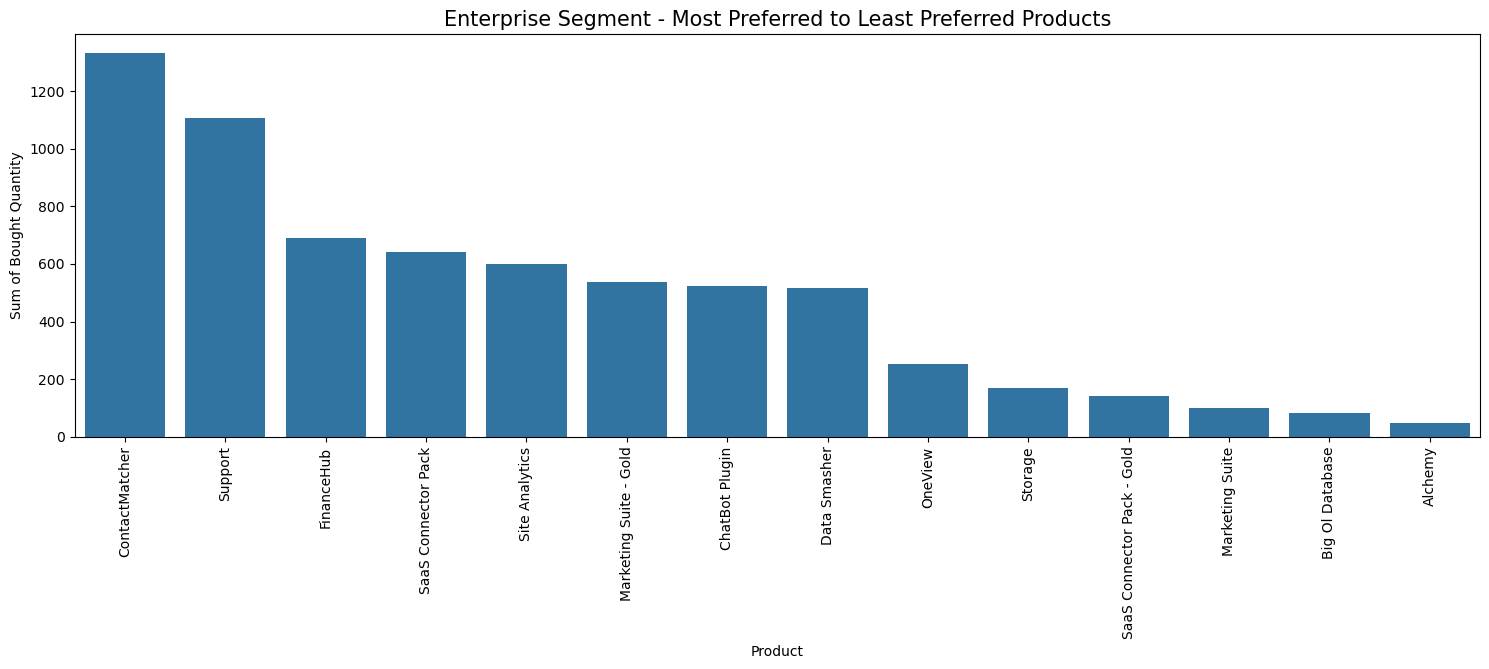

In [51]:
enterprise_preferences = customer_preferences[customer_preferences["Segment"] == "Enterprise"].sort_values(by = "Quantity", ascending = False)

plt.figure(figsize = (15,5))
sns.barplot(data = enterprise_preferences, x = "Product", y = "Quantity")
plt.title("Enterprise Segment - Most Preferred to Least Preferred Products", size = 15)
plt.xlabel("Product", size = 10)
plt.ylabel("Sum of Bought Quantity", size = 10)
plt.tight_layout()
plt.xticks(rotation = 90)
plt.show()